## **Name**: Saurish Srivastava
## **Status**: UG2
## **Department**: COS

# ***CBE 512. Machine Learning in Chemical Science and Engineering.***
## **Assignment 02:** *Preliminaries, Regression+Classification*
### &#169; Princeton University
### **DUE**: 11:59pm, October 04, 2024
### **Notes**: Supply responses/solutions in a packaged format, including notebook (.ipynb) and any supporting files required to run the notebook. Your assignment should be submitted to Canvas.



---
## **Problem 1, Concept check (25 points):**

**(a)** *In about a paragraph*, describe the fundamental distinction between supervised vs. unsupervised learning and classification vs. regression. For each case, try to identify/explain a setting (in physical science/engineering) for which these modes of machine learning may be appropriate.

---


***Student Response:***

Supervised learning is when a model is trained on labeled data, so the input and the corresponding output is provided. This is great for tasks where it's necessary to predict outcomes based on specific input features. For instance, in the physical sciences: one could use supervised learning to predict the properties of new chemical compounds based on their molecular structures, if you trained a model on all this data. But, unsupervised learning is when a model is trained on unlabeled data and is used to identify hidden patterns. In the context of the physical sciences, this could be great for clustering molecules based on the similarities in their chemical structures. In this case, there are no predefined categories, it's just "learning" the data. In terms of the classification question: classification revolves around assigning inputs to discrete categories (which could be useful for improving drug design by identifying suitable compounds for it). On the contrary, regression predicts continuous values—i.e. one could use regression to model the temperature of a reaction over time with input variables like pressure or concentration or any other chemical properties.

**(b)** In class, we have often noted when a problem might be solved exactly using techniques from linear algebra (using matrix inversion and minimizing projection error). Remark on the scope/applicability of this approach (i.e., for what class of models and errors is it useful). Use this explanation to expand on the utility of machine learning. *Hint*: your reponse should touch on model complexity and the nature of loss functions.

---

***Student Response:***

I think the linear algebra techniques that we covered (i.e. matrix inversion and minimizing projection error) are probably highly effective for *linear* models (i.e. ordinary least squares regression), where the goal is to minimize squared error between predicted and observed values. Given that, it makes sense that these methods work well when errors are additive and follow some sort of a Gaussian distribution, but they aren't so great when models become non-linear or overly complex (because this would probably require some sort of iterative process, like gradient descent). In ML, nonlinear loss functions (like cross-entropy) and efficiency concerns in large datasets probably means that we need to use stochastic optimization methods, as opposed to exact solutions—and this is the benefit of tricks like the kernel trick, because we are not wasting computational resources and can handle more complex models and diverse data efficiently.








**(c)** Explain the utility of feature scaling (in general). Pick one feature-scaling method available in scikit-learn. Describe its approach/implementation and discuss any advantages/limitations.

---

***Student Response:***

Feature scaling is really important during preprocessing because it standardizes the range of independent variables. The utility of feature scaling is that it's able to make it so that all features contribute equally to model training (and not the case that one is having more of an impact than another), especially in algorithms that rely on distance. Without having feature scaling, features with larger numeric ranges could potentially dominate the model, which would lead it to be biased and implying inefficient training.

- One method is the `StandardScaler`, which is arguably the most common, and standardizes features by removing the mean and scaling to unit variance. Advantage
- ensures that each feature equally contributes to distance calculations (which is good for distance-based algorithms). However, a limitation is that it just assumes that all the features follow a Gaussian distribution (which is often not the case with real-world data).

**(d)** In class, we discussed some of the dangers of simple gradient descent as a method for parameter optimization. Explain how methods like "gradient descent with momentum" or "stochastic" gradient descent might be superior by contrast.

---

***Student Response:***

Gradient descent with momentum might be better because it can reduce oscillations (because the momentum would smooth out updates and stabilize the learning process), and it would converge faster (because it increases update size). SGD is better because it has faster updates (because it's batch-based so it has faster iteration) and is also able to escape local minima (because stochastic updates introdue noise which help SGD get out of shallow local minima).

**(e)** In the vernacular of class, what is the distinction between "parameters" and "hyperparameters." For the case of support vector machines and random forest models, identify and explain some of the more evident hyperparameters.

---

***Student Response:***

I don't recall the specific language that Prof. Webb used to describe hyperparameters and parameters (I do remember that the Merriam-Webster dictionary definitions aren't accurate though!). But, the way I think about the difference is as such: parameters are the internal values that the model learns while training—so it's essentially like the "knowledge" of the model that's consistently being updated. However, the *hyper*parameters, are (potential) features, but also settings that we choose before training the model to help how it learns.

Some common hyperparameters for SVMs:
- kernel: decides the type of boundary for the SVM
- C: controls how much the model tries to avoid mistakes on the training side

Some common hyperparameters for random forests:
- number of trees: the number of decision trees
- max depth: the maximum depth of each tree
- (more below on the random forest question)



---


## **Problem 2, Rest and Regression (40 points):**

Examine the contents of `solubility_regression.csv`.
You can download and view it on your own or easily examine the contents on [github](https://github.com/webbtheosim/CBE512-MLinChmSciEng/blob/main/data/solubility-regression-cbe512.csv).

This is an expanded version of the solubility dataset used in the first problem set. Notably, whereas previously the `.csv` had columns for just `SMILES`, `Solubility`, and `MolWt`, now there are many more columns that can be used as inputs in our feature vectors.

Overall, we are going to explore aspects of model-building with the example of multivariate linear regression. For this problem part, your *label* that we want to predict will be `Solubility`

---



**(a)** Begin by partitioning the data into a simple 80/20 train/test split.
You may either use your own function to do this train-test split, or you may use a function from scikit-learn (e.g., `sklearn.model_selection.train_test_split`).
Pick two features in the dataset and compare the distribution of those features with each other and how those features compare between the proposed training and test set.
What considerations might one have with respect to these distributions in developing subsequent machine learning models?

---

In [71]:
# import modules for this problem (after installing them with pip)
import pandas as pd
import matplotlib.pyplot as plt
import numpy as np
import seaborn as sns

In [72]:
# first load in the data
url_for_table = "https://raw.githubusercontent.com/webbtheosim/CBE512-MLinChmSciEng/refs/heads/main/data/solubility-regression-cbe512.csv"
solubility_regression = pd.read_csv(url_for_table, sep=",")
solubility_regression.head(10)

,ID,Name,InChI,InChIKey,SMILES,MolWt,MolLogP,MolMR,HeavyAtomCount,NumHAcceptors,...,NumValenceElectrons,NumAromaticRings,NumSaturatedRings,NumAliphaticRings,RingCount,TPSA,LabuteASA,BalabanJ,BertzCT,Solubility
0,A-3,"N,N,N-trimethyloctadecan-1-aminium bromide",InChI=1S/C21H46N.BrH/c1-5-6-7-8-9-10-11-12-13-...,SZEMGTQCPRNXEG-UHFFFAOYSA-M,[Br-].CCCCCCCCCCCCCCCCCC[N+](C)(C)C,392.510,3.95810,102.4454,23,0,...,142,0,0,0,0,0.00,158.520601,0.000000e+00,210.377334,-3.616127
1,A-4,Benzo[cd]indol-2(1H)-one,InChI=1S/C11H7NO/c13-11-8-5-1-3-7-4-2-6-9(12-1...,GPYLCFQEKPUWLD-UHFFFAOYSA-N,O=C1Nc2cccc3cccc1c23,169.183,2.40550,51.9012,13,1,...,62,2,0,1,3,29.10,75.183563,2.582996e+00,511.229248,-3.254767
2,A-5,4-chlorobenzaldehyde,InChI=1S/C7H5ClO/c8-7-3-1-6(5-9)2-4-7/h1-5H,AVPYQKSLYISFPO-UHFFFAOYSA-N,Clc1ccc(C=O)cc1,140.569,2.15250,36.8395,9,1,...,46,1,0,0,1,17.07,58.261134,3.009782e+00,202.661065,-2.177078
3,A-8,"zinc bis[2-hydroxy-3,5-bis(1-phenylethyl)benzo...",InChI=1S/2C23H22O3.Zn/c2*1-15(17-9-5-3-6-10-17...,XTUPUYCJWKHGSW-UHFFFAOYSA-L,[Zn++].CC(c1ccccc1)c2cc(C(C)c3ccccc3)c(O)c(c2)...,756.226,8.11610,200.7106,53,6,...,264,6,0,0,6,120.72,323.755434,2.320000e-07,1964.648666,-3.924409
4,A-9,4-({4-[bis(oxiran-2-ylmethyl)amino]phenyl}meth...,InChI=1S/C25H30N2O4/c1-5-20(26(10-22-14-28-22)...,FAUAZXVRLVIARB-UHFFFAOYSA-N,C1OC1CN(CC2CO2)c3ccc(Cc4ccc(cc4)N(CC5CO5)CC6CO...,422.525,2.48540,119.0760,31,6,...,164,2,4,4,6,56.60,183.183268,1.084427e+00,769.899934,-4.662065
5,A-10,vinyltoluene,"InChI=1S/C9H10/c1-3-9-6-4-5-8(2)7-9/h3-7H,1H2,2H3",JZHGRUMIRATHIU-UHFFFAOYSA-N,Cc1cccc(C=C)c1,118.179,2.63802,41.2700,9,0,...,46,1,0,0,1,0.00,55.836626,3.070761e+00,211.033224,-3.123150
6,A-11,3-(3-ethylcyclopentyl)propanoic acid,InChI=1S/C10H18O2/c1-2-8-3-4-9(7-8)5-6-10(11)1...,WVRFSLWCFASCIS-UHFFFAOYSA-N,CCC1CCC(CCC(O)=O)C1,170.252,2.67750,47.9918,12,1,...,70,0,1,1,1,37.30,73.973655,2.145839e+00,153.917569,-3.286116
7,A-12,"11,16,17,21-tetrahydroxypregna-1,4-diene-3,20-...",InChI=1S/C21H28O6/c1-19-6-5-12(23)7-11(19)3-4-...,SEKYBDYVXDAYPY-UHFFFAOYSA-N,CC12CC(O)C3C(CCC4=CC(=O)C=CC34C)C1CC(O)C2(O)C(...,376.449,0.52840,96.4382,27,6,...,148,0,3,4,4,115.06,158.135542,1.776978e+00,755.770792,-2.664549
8,A-14,bis(4-fluorophenyl)methanone,InChI=1S/C13H8F2O/c14-11-5-1-9(2-6-11)13(16)10...,LSQARZALBDFYQZ-UHFFFAOYSA-N,Fc1ccc(cc1)C(=O)c2ccc(F)cc2,218.202,3.19580,56.2325,16,1,...,80,2,0,0,2,17.07,91.346032,2.315628e+00,452.960733,-4.396652
9,A-15,1-[2-(benzoyloxy)propoxy]propan-2-yl benzoate ...,InChI=1S/C20H22O5/c21-19(17-9-3-1-4-10-17)24-1...,BYQDGAVOOHIJQS-UHFFFAOYSA-N,O=C(OCCCOCCCOC(=O)c1ccccc1)c2ccccc2,342.391,3.49720,93.5020,25,5,...,132,2,0,0,2,61.83,147.071714,1.447050e+00,582.150793,-4.595503


In [73]:
# for learning purposes, i'm going to create my own 80/20 train/test split
# first, convert data to numpy
data = solubility_regression.to_numpy()

# find the index of the 'solubility' column
solubility_index = np.where(solubility_regression.columns == 'Solubility')[0][0]

# separate the 'solubility' column as y and the rest as X
y = data[:, solubility_index]
X = np.delete(data, solubility_index, axis=1)  # all other columns

# shuffle and set a seed for reproducibility
np.random.seed(42)
indices = np.arange(X.shape[0])
np.random.shuffle(indices)

# apply the shuffled indices to both X and y
X_shuffled = X[indices]
y_shuffled = y[indices]

# find out the 80th percentile index
split_index = int(0.8 * len(data))

# split data into train/test
X_train = X_shuffled[:split_index]
y_train = y_shuffled[:split_index]
X_test = X_shuffled[split_index:]
y_test = y_shuffled[split_index:]

# validating the sizes
print(f"X_train set size: {X_train.shape[0]}; expected size: {len(data) * 0.8}")
print(f"X_test set size: {X_test.shape[0]}; expected size: {len(data) * 0.2}")
print(f"y_train set size: {y_train.shape[0]}; expected size: {len(data) * 0.8}")
print(f"y_test set size: {y_test.shape[0]}; expected size: {len(data) * 0.2}")

X_train set size: 7985; expected size: 7985.6
X_test set size: 1997; expected size: 1996.4
y_train set size: 7985; expected size: 7985.6
y_test set size: 1997; expected size: 1996.4


reasoning for why this is still correct: given that you can't have 0.6 of data and 0.4 of data, having the difference of one here is fine (as long as the total is the same, which it is)

**but**, let's just check with sklearn, just in case:

In [74]:
from sklearn.model_selection import train_test_split

# convert data to numpy
data = solubility_regression.to_numpy()

# find the index of the 'solubility' column
solubility_index = np.where(solubility_regression.columns == 'Solubility')[0][0]

# separate the 'solubility' column as y and the rest as X
y = data[:, solubility_index]
X = np.delete(data, solubility_index, axis=1)  # all other columns

# split the data into training and testing sets (80/20 split)
X_train, X_test, y_train, y_test = train_test_split(X, y, test_size=0.2, random_state=42)

# validating the sizes
print(f"X_train set size: {X_train.shape[0]}; expected size: {len(data) * 0.8}")
print(f"X_test set size: {X_test.shape[0]}; expected size: {len(data) * 0.2}")
print(f"y_train set size: {y_train.shape[0]}; expected size: {len(data) * 0.8}")
print(f"y_test set size: {y_test.shape[0]}; expected size: {len(data) * 0.2}")

X_train set size: 7985; expected size: 7985.6
X_test set size: 1997; expected size: 1996.4
y_train set size: 7985; expected size: 7985.6
y_test set size: 1997; expected size: 1996.4


so, we know we are correct :)

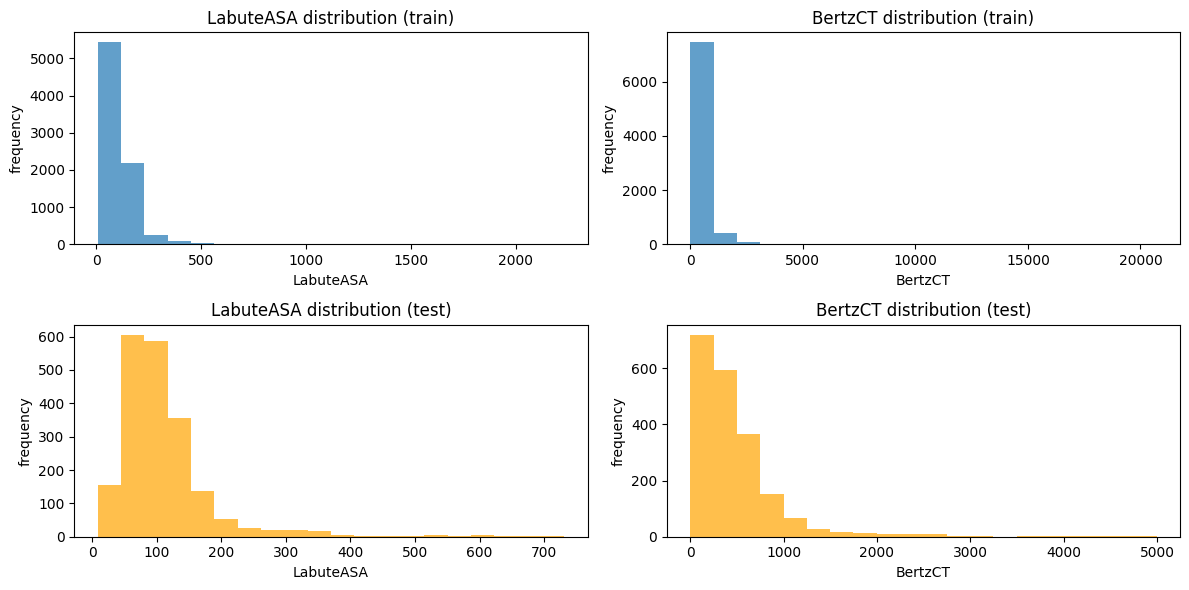

train LabuteASA mean: 108.59403277026628, std: 76.80873005512461
test LabuteASA mean: 110.18632190398995, std: 75.0687576732764
train BertzCT mean: 465.07777748181314, std: 551.2816520611063
test BertzCT mean: 476.36940519887463, std: 527.6673872689462


In [75]:
columns = solubility_regression.columns.drop('Solubility')
train_df = pd.DataFrame(X_train, columns=columns)
test_df = pd.DataFrame(X_test, columns=columns)

feature1 = 'LabuteASA'
feature2 = 'BertzCT'

# plot histograms for both features
plt.figure(figsize=(12, 6))

# train data distributions
plt.subplot(2, 2, 1)
plt.hist(train_df[feature1], bins=20, alpha=0.7, label='Train')
plt.title(f'{feature1} distribution (train)')
plt.xlabel(feature1)
plt.ylabel('frequency')

plt.subplot(2, 2, 2)
plt.hist(train_df[feature2], bins=20, alpha=0.7, label='Train')
plt.title(f'{feature2} distribution (train)')
plt.xlabel(feature2)
plt.ylabel('frequency')

# test data distributions
plt.subplot(2, 2, 3)
plt.hist(test_df[feature1], bins=20, alpha=0.7, color='orange', label='Test')
plt.title(f'{feature1} distribution (test)')
plt.xlabel(feature1)
plt.ylabel('frequency')

plt.subplot(2, 2, 4)
plt.hist(test_df[feature2], bins=20, alpha=0.7, color='orange', label='Test')
plt.title(f'{feature2} distribution (test)')
plt.xlabel(feature2)
plt.ylabel('frequency')

plt.tight_layout()
plt.show()

# get mean/std
print(f"train {feature1} mean: {train_df[feature1].mean()}, std: {train_df[feature1].std()}")
print(f"test {feature1} mean: {test_df[feature1].mean()}, std: {test_df[feature1].std()}")
print(f"train {feature2} mean: {train_df[feature2].mean()}, std: {train_df[feature2].std()}")
print(f"test {feature2} mean: {test_df[feature2].mean()}, std: {test_df[feature2].std()}")

some considerations for creating ml models:
- having a *substantial* difference between the train/test datasets — because then the model won't generalize well to unseen data. i think the best practice here is to try and ensure that the data is split in a way that reflects the distribution of the real-world data the model will be predicting on
- feature scaling: different distributions could also have a need for feature scaling so this is probably something to explore before building the model
- outliers: if they exist, it's helpful to isolate those cases, because the model may not predict well on them

**(b)** Now create and train a multivariate [linear regression](https://scikit-learn.org/stable/modules/generated/sklearn.linear_model.LinearRegression.html#sklearn.linear_model.LinearRegression) model that takes available *numerical* features as input and predicts solubility. You may choose to implement feature-scaling in anyway you like (if at all).
How well does the model fit the data it was trained on? How well does it generalize to the test set?

---





In [76]:
from sklearn.linear_model import LinearRegression
from sklearn.preprocessing import StandardScaler
from sklearn.metrics import mean_squared_error, r2_score

numerical_features = ['MolWt', 'MolLogP', 'MolMR', 'HeavyAtomCount', 'NumHAcceptors', 'NumHDonors',
                      'NumHeteroatoms', 'NumRotatableBonds', 'NumValenceElectrons', 'NumAromaticRings',
                      'NumSaturatedRings', 'NumAliphaticRings', 'RingCount', 'TPSA', 'LabuteASA',
                      'BalabanJ', 'BertzCT']

# select only the numerical features by column indices
numerical_indices = [solubility_regression.columns.get_loc(col) for col in numerical_features]

# only include selected numerical columns
X_train_numerical = X_train[:, numerical_indices]
X_test_numerical = X_test[:, numerical_indices]

# add feature scaling
scaler = StandardScaler()
X_train_scaled = scaler.fit_transform(X_train_numerical)
X_test_scaled = scaler.transform(X_test_numerical)

# create/train the linear regression model
model = LinearRegression()
model.fit(X_train_scaled, y_train)

# predict
y_train_pred = model.predict(X_train_scaled)
y_test_pred = model.predict(X_test_scaled)

# evaluate w/ r^2 & MSE
train_r2 = r2_score(y_train, y_train_pred)
train_mse = mean_squared_error(y_train, y_train_pred)
test_r2 = r2_score(y_test, y_test_pred)
test_mse = mean_squared_error(y_test, y_test_pred)

print(f"training R^2: {train_r2:.4f}")
print(f"training MSE: {train_mse:.4f}")
print(f"test R^2: {test_r2:.4f}")
print(f"test MSE: {test_mse:.4f}")

training R^2: 0.5154
training MSE: 2.7398
test R^2: 0.4955
test MSE: 2.7369


just out of curiosuity i'm going to try and see what happens if i don't use a scaler:

In [77]:
numerical_features = ['MolWt', 'MolLogP', 'MolMR', 'HeavyAtomCount', 'NumHAcceptors', 'NumHDonors',
                      'NumHeteroatoms', 'NumRotatableBonds', 'NumValenceElectrons', 'NumAromaticRings',
                      'NumSaturatedRings', 'NumAliphaticRings', 'RingCount', 'TPSA', 'LabuteASA',
                      'BalabanJ', 'BertzCT']

# select only the numerical features by column indices
numerical_indices = [solubility_regression.columns.get_loc(col) for col in numerical_features]

# only include selected numerical columns
X_train_numerical = X_train[:, numerical_indices]
X_test_numerical = X_test[:, numerical_indices]

# create/train the linear regression model
model = LinearRegression()
model.fit(X_train_numerical, y_train)

# predict
y_train_pred = model.predict(X_train_numerical)
y_test_pred = model.predict(X_test_numerical)

# evaluate w/ r^2 & MSE
train_r2 = r2_score(y_train, y_train_pred)
train_mse = mean_squared_error(y_train, y_train_pred)
test_r2 = r2_score(y_test, y_test_pred)
test_mse = mean_squared_error(y_test, y_test_pred)

print(f"training R^2: {train_r2:.4f}")
print(f"training MSE: {train_mse:.4f}")
print(f"test R^2: {test_r2:.4f}")
print(f"test MSE: {test_mse:.4f}")


training R^2: 0.5154
training MSE: 2.7398
test R^2: 0.4955
test MSE: 2.7369


interestingly, it performs the same. my hypothesis for why: the transformation of the features through scaling (like standardization) shouldn't affect the relationship's modeled by the regression if the target variable is *linearly* derived from the features in the first place (which is probably what is happening here).

---

training: model explains about 51.5% of the variance in the training data which is ~okay - lot's of room for improvement though. the mse is relatively low, which means the model probably isn't deviating from the true value that much and is fitting the data fairly well.

test: model explains about 49.5% of the variance in the test set, which is lower than the above so the model is performing slightly worse on unseen data (which makes sense). but since that drop isn't that low, it means the model is generalizing fairly well. also has a relatively low mse as well, which means the model's error rate remains consistent between the training and test sets, and indicates relatively good generalization.

**(c)** Some of the features might not be useful, adding unnecessary noise and complexity to the model.
In this part, you will select a "minimal" set of features that still results in a quality linear model by using cross-validation and information criteria.

While we *could* evaluate the space of combinations exhaustively (code will take appx. 1.5 hrs to run) we will instead use a greedy, stepwise algorithm to build up a feature list.
Starting with the null model (no features, optimal model would just predict the mean for every input), compare models that augment the existing model with one of the features from the remaining pool of features.
Use the mean $r^2$ obtained from cross validation as the metric for comparing models with the same complexity (i.e., same number of features)
Identify the feature that results in the best model and add it permanently to the feature list; make note of the model's performance metrics.
Then, repeat the procedure until all seventeen features have been included.
The result should be a plot of model performance as a function of model complexity.
Now, compare the best models identified at every step of the procedure using an *information criterion* of your choice as the metric for comparison. Which model is ``optimal''? Compare the predictive performance of this model to that of part **b**.


***Note:*** Minimizing the MSE of the linear model is equivalent to maximizing the MLE of the probabilistic form of the linear model. In this probabilistic framework, regularization is seen as putting a prior belief on the your parameters and instead maximizing the *a posteriori* estimate (MAP) with respect to parameters of the model.
The specific form of the $\ell_1$ norm regularization term comes from asserting a Gaussian prior on the parameters where the mean is 0, and the variance of this distribution is the hyperparameter of the model. Accordingly, hyperparameters in many models formulated within a probabilistic framework are parameters of the prior distributions that are placed on parameters. To read more about this, visit [this description](https://bjlkeng.github.io/posts/probabilistic-interpretation-of-regularization).

---






step 1: added feature MolLogP, cv r^2: 0.3577
step 2: added feature RingCount, cv r^2: 0.3960
step 3: added feature NumHDonors, cv r^2: 0.4072
step 4: added feature NumHeteroatoms, cv r^2: 0.4203
step 5: added feature NumHAcceptors, cv r^2: 0.4508
step 6: added feature BertzCT, cv r^2: 0.4545
step 7: added feature NumSaturatedRings, cv r^2: 0.4646
step 8: added feature LabuteASA, cv r^2: 0.4837
step 9: added feature MolMR, cv r^2: 0.4879
step 10: added feature NumAromaticRings, cv r^2: 0.4903
step 11: added feature NumRotatableBonds, cv r^2: 0.4922
step 12: added feature HeavyAtomCount, cv r^2: 0.4927
step 13: added feature NumValenceElectrons, cv r^2: 0.4998
step 14: added feature MolWt, cv r^2: 0.5024
step 15: added feature NumAliphaticRings, cv r^2: 0.5023
step 16: added feature BalabanJ, cv r^2: 0.5022
step 17: added feature TPSA, cv r^2: 0.5014


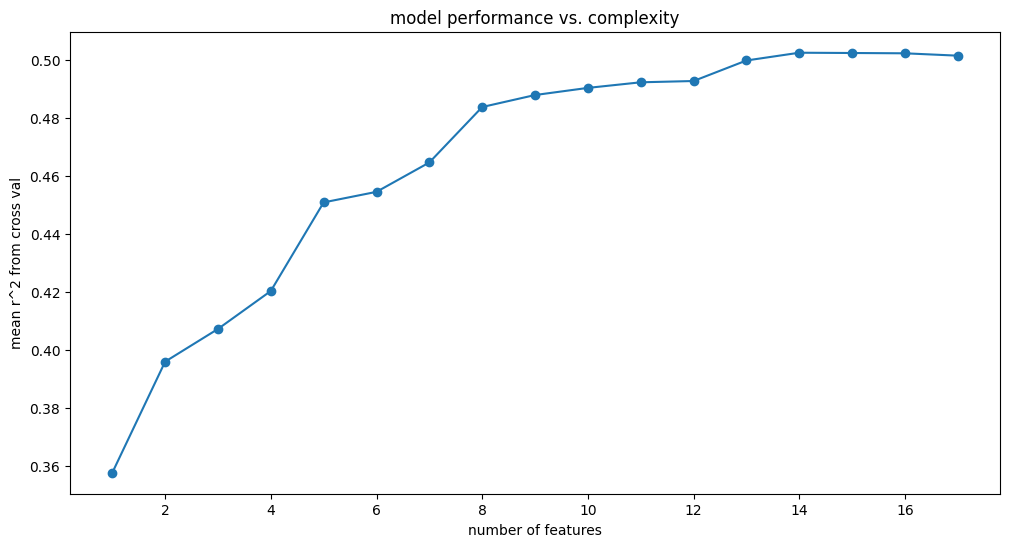

In [78]:
from sklearn.model_selection import cross_val_score, KFold

def aic(y, y_pred, k):
    n = len(y)
    mse = mean_squared_error(y, y_pred)
    return 2 * k + n * np.log(mse)

# using same numerical data as above
scaler = StandardScaler()
X_train_scaled = scaler.fit_transform(X_train_numerical)
X_test_scaled = scaler.transform(X_test_numerical)

feature_names = numerical_features
n_features = len(feature_names)

selected_features = []
remaining_features = list(range(n_features))
cv_scores = []
aic_scores = []

for i in range(n_features):
    best_score = -np.inf
    best_feature = None

    # get the best feature
    for feature in remaining_features:
        current_features = selected_features + [feature]
        X_current = X_train_scaled[:, current_features]

        # perform cv to get mean r^2 score
        scores = cross_val_score(LinearRegression(), X_current, y_train, cv=5, scoring='r2')
        mean_score = np.mean(scores)

        # check if this score is better
        if mean_score > best_score:
            best_score = mean_score
            best_feature = feature

    selected_features.append(best_feature)
    remaining_features.remove(best_feature)
    cv_scores.append(best_score)

    # train model with current features and calculate AIC
    X_current = X_train_scaled[:, selected_features]
    model = LinearRegression().fit(X_current, y_train)
    y_pred = model.predict(X_current)
    aic_scores.append(aic(y_train, y_pred, len(selected_features)))

    # print what we're doing at each step
    print(f"step {i+1}: added feature {feature_names[best_feature]}, cv r^2: {best_score:.4f}")

# plot the results
plt.figure(figsize=(12, 6))
plt.plot(range(1, n_features + 1), cv_scores, marker='o')
plt.xlabel('number of features')
plt.ylabel('mean r^2 from cross val')
plt.title('model performance vs. complexity')
plt.show()

In [24]:
# find optimal model based on AIC
optimal_features = selected_features[:np.argmin(aic_scores) + 1]
print(f"optimal number of features (based on AIC) is {len(optimal_features)}:\n{[feature_names[i] for i in optimal_features]}")

# train/eval optimal model
X_train_optimal = X_train_scaled[:, optimal_features]
X_test_optimal = X_test_scaled[:, optimal_features]

optimal_model = LinearRegression().fit(X_train_optimal, y_train)
y_train_pred_optimal = optimal_model.predict(X_train_optimal)
y_test_pred_optimal = optimal_model.predict(X_test_optimal)

train_r2_optimal = r2_score(y_train, y_train_pred_optimal)
test_r2_optimal = r2_score(y_test, y_test_pred_optimal)
train_mse_optimal = mean_squared_error(y_train, y_train_pred_optimal)
test_mse_optimal = mean_squared_error(y_test, y_test_pred_optimal)

print("\noptimal model performance:")
print(f"training r^2: {train_r2_optimal:.4f}")
print(f"test r^2: {test_r2_optimal:.4f}")
print(f"training MSE: {train_mse_optimal:.4f}")
print(f"test MSE: {test_mse_optimal:.4f}")

optimal number of features (based on AIC) is 14:
['MolLogP', 'RingCount', 'NumHDonors', 'NumHeteroatoms', 'NumHAcceptors', 'BertzCT', 'NumSaturatedRings', 'LabuteASA', 'MolMR', 'NumAromaticRings', 'NumRotatableBonds', 'HeavyAtomCount', 'NumValenceElectrons', 'MolWt']

optimal model performance:
training r^2: 0.5152
test r^2: 0.4925
training MSE: 2.7405
test MSE: 2.7529


we see here that the optimal model based on AIC uses 14 features (which are listed above). on a first glance, this performance appears slightly worse than the model in part **b** ($r^2: 0.4955$, mse: $2.7369$ for part **b** vs. $r^2: 0.4925$, mse: $2.7529$ for the "optimal" model). but, this comparison isn't entirely accurate due to the differences in evaluation methods for both parts:
- the part **b** model did not use cross val for its reported $r^2$ value, whereas the optimal model's performance was tested w/ a 5-fold cross-val.
- to have a fair comparison, we need to compare step 17 from [here](https://colab.research.google.com/drive/1vlIEDjGsYeqgkImGtqs3TU5rlRE9e5C6#scrollTo=2wf4vtETO0Su&line=37&uniqifier=1), which has all the features. here, the model achieves an $r^2$ value of 0.5014, showing that the "optimal" model is slightly better.
- conclusion: from this, we can see that even though there are less features, the optimal model has slightly improved performance (and reduces the potential for overfitting), which could be more generalizable.

**(d)** Using scikit-learn, explore the use of a non-linear regressor other than a neural network (like random-forest-- we will spend more time on neural networks later) for predicting solubility. Explain how this model works and what the parameters are. What are the hyperparameters associated with this model and what do they control? Explore the effects of changing these hyperparameters on the predictive performance of your model.
Use grid-search and cross-validation to identify an optimal set of *hyperparameters*.
Examine how your results change using *(i)* the full set of features and *(ii)}* the set of features identified in part **c**.

***Note:*** Grid search with cross-validation exhaustively evaluates all hyperparameter combinations, which may take several minutes to complete depending on the grid size (i.e., number of hyperparameters and their options).

---

In [81]:
from sklearn.ensemble import RandomForestRegressor
from sklearn.model_selection import GridSearchCV, cross_val_score

# intialize rf model w/ minimal hyperparams (bc it wouldn't run fast enough)
rf_model = RandomForestRegressor(
    n_estimators=10, # only using 10 trees
    max_depth=5,
    min_samples_split=2, # minimum samples to split an internal node
    min_samples_leaf=1, # minimum samples at a leaf node
    random_state=42
)

# define hyperparameters for tuning with minimal options (I tried using other numbers, but it took way too long)
param_grid = {
    'n_estimators': [10, 100],
    'max_depth': [5, 10],
    'min_samples_split': [2, 5],
    'min_samples_leaf': [1, 2]
}

# grid search w/ cross val
print("performing grid search w/ cross val")
grid_search = GridSearchCV(estimator=rf_model, param_grid=param_grid, cv=5, scoring='r2', n_jobs=-1)

# full feature set
print("\ntraining and evaluating w/ full feature set:")
grid_search.fit(X_train_scaled, y_train)

best_rf_model = grid_search.best_estimator_
print(f"best hyperparameters: {grid_search.best_params_}")

y_train_pred_full = best_rf_model.predict(X_train_scaled)
y_test_pred_full = best_rf_model.predict(X_test_scaled)

train_r2_full = r2_score(y_train, y_train_pred_full)
test_r2_full = r2_score(y_test, y_test_pred_full)
train_mse_full = mean_squared_error(y_train, y_train_pred_full)
test_mse_full = mean_squared_error(y_test, y_test_pred_full)

print(f"full feature set - train r^2: {train_r2_full:.4f}, test r^2: {test_r2_full:.4f}")
print(f"full feature set - train MSE: {train_mse_full:.4f}, test MSE: {test_mse_full:.4f}")

# optimal feature set from (c)
print("training and evaluating using optimal feature set from part c:")
X_train_optimal = X_train_scaled[:, optimal_features]
X_test_optimal = X_test_scaled[:, optimal_features]

grid_search.fit(X_train_optimal, y_train)

best_rf_model_optimal = grid_search.best_estimator_
print(f"best hyperparameters (optimal features): {grid_search.best_params_}")

y_train_pred_optimal = best_rf_model_optimal.predict(X_train_optimal)
y_test_pred_optimal = best_rf_model_optimal.predict(X_test_optimal)

train_r2_optimal = r2_score(y_train, y_train_pred_optimal)
test_r2_optimal = r2_score(y_test, y_test_pred_optimal)
train_mse_optimal = mean_squared_error(y_train, y_train_pred_optimal)
test_mse_optimal = mean_squared_error(y_test, y_test_pred_optimal)

print(f"optimal feature set - train r^2: {train_r2_optimal:.4f}, test r^2: {test_r2_optimal:.4f}")
print(f"optimal feature set - train MSE: {train_mse_optimal:.4f}, test MSE: {test_mse_optimal:.4f}")

performing grid search w/ cross val

training and evaluating w/ full feature set:
best hyperparameters: {'max_depth': 10, 'min_samples_leaf': 2, 'min_samples_split': 2, 'n_estimators': 100}
full feature set - train r^2: 0.8685, test r^2: 0.7646
full feature set - train MSE: 0.7433, test MSE: 1.2770

training and evaluating using optimal feature set from part c:
best hyperparameters (optimal features): {'max_depth': 10, 'min_samples_leaf': 2, 'min_samples_split': 2, 'n_estimators': 100}
optimal feature set - train r^2: 0.8580, test r^2: 0.7461
optimal feature set - train MSE: 0.8026, test MSE: 1.3774


quick one-sentence summary: random forest is an ensemble learning method that operates by building multiple decision trees during training and then outputting the mean prediction of the indvidual trees for specific regression tasks. the parameters are learned during training and are probably like the weights of the trees and the tree structures (the actual splits) themselves.

in terms of the hyperparameters:
- `n_estimators`: the number of trees in the forest
- `max_depth`: controls the maximum depth of each tree ($\uparrow$ `max_depth` can capture more noise, so $\downarrow$ `max_depth` can help prevent against overfitting)
- `min_samples_split`: minimum samples required to split an internal node ($\uparrow$ can make model more conservative, and potentially reduce overfitting)
- `min_samples_leaf`: minimum samples required to be at a leaf node ($\uparrow$ can lead to more generalized trees)

i was curious about feature importance, so:

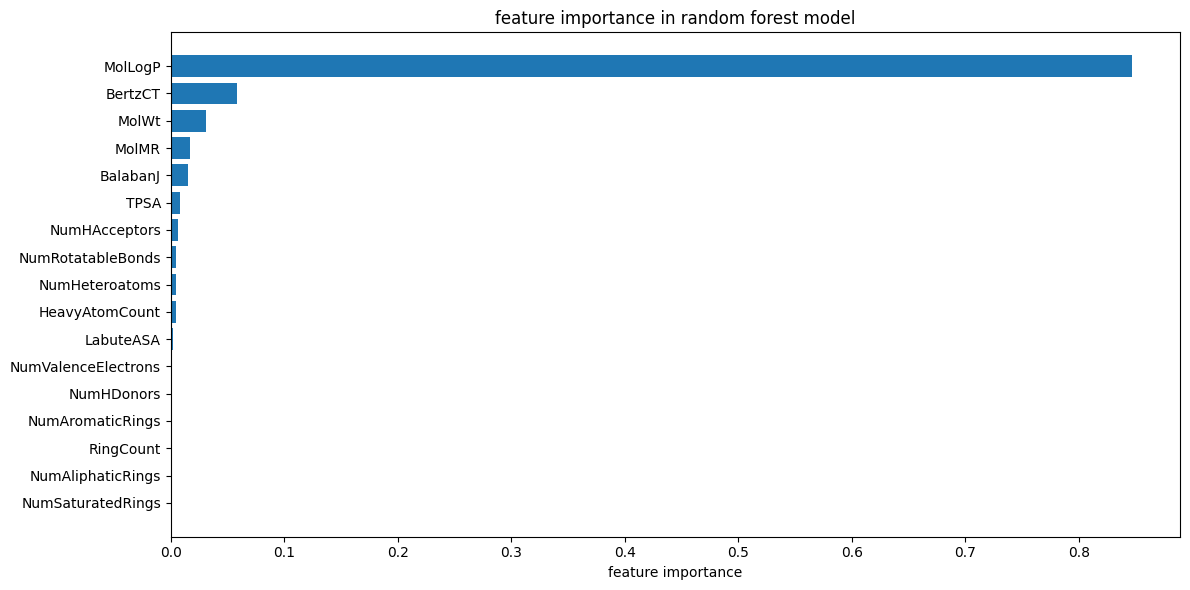

In [80]:
# compare feature importance
feature_importance = best_rf_model.feature_importances_
sorted_idx = np.argsort(feature_importance)
pos = np.arange(sorted_idx.shape[0]) + .5

plt.figure(figsize=(12, 6))
plt.barh(pos, feature_importance[sorted_idx], align='center')
plt.yticks(pos, np.array(feature_names)[sorted_idx])
plt.xlabel('feature importance')
plt.title('feature importance in random forest model')
plt.tight_layout()
plt.show()



---

## **Problem 3. High classification. (35 points):**

Examine the contents of `solubility_classification.csv`.
You can download and view it on your own or easily examine the contents on [github](https://github.com/webbtheosim/CBE512-MLinChmSciEng/blob/main/data/solubility-classification-cbe512.csv). This is the same dataset as in **Problem 2** except we have removed `Solubility` as a label and included `Group`. For this problem part, your *label* that we want to predict is the class featured in `Group`


---



**(a)** Use multivariate [logistic regression](https://scikit-learn.org/stable/modules/generated/sklearn.linear_model.LogisticRegression.html) to predict the solubility `Group` of a molecule from the numerical features in the dataset. Follow the same principles as in **Problem 2a**.

---



In [65]:
# first load in the data
url_for_table = "https://raw.githubusercontent.com/webbtheosim/CBE512-MLinChmSciEng/refs/heads/main/data/solubility-classification-cbe512.csv"
solubility_classification = pd.read_csv(url_for_table, sep=",")
solubility_classification.head(10)

,ID,Name,InChI,InChIKey,SMILES,MolWt,MolLogP,MolMR,HeavyAtomCount,NumHAcceptors,...,NumValenceElectrons,NumAromaticRings,NumSaturatedRings,NumAliphaticRings,RingCount,TPSA,LabuteASA,BalabanJ,BertzCT,Group
0,A-3,"N,N,N-trimethyloctadecan-1-aminium bromide",InChI=1S/C21H46N.BrH/c1-5-6-7-8-9-10-11-12-13-...,SZEMGTQCPRNXEG-UHFFFAOYSA-M,[Br-].CCCCCCCCCCCCCCCCCC[N+](C)(C)C,392.510,3.95810,102.4454,23,0,...,142,0,0,0,0,0.00,158.520601,0.000000e+00,210.377334,G1
1,A-4,Benzo[cd]indol-2(1H)-one,InChI=1S/C11H7NO/c13-11-8-5-1-3-7-4-2-6-9(12-1...,GPYLCFQEKPUWLD-UHFFFAOYSA-N,O=C1Nc2cccc3cccc1c23,169.183,2.40550,51.9012,13,1,...,62,2,0,1,3,29.10,75.183563,2.582996e+00,511.229248,G1
2,A-5,4-chlorobenzaldehyde,InChI=1S/C7H5ClO/c8-7-3-1-6(5-9)2-4-7/h1-5H,AVPYQKSLYISFPO-UHFFFAOYSA-N,Clc1ccc(C=O)cc1,140.569,2.15250,36.8395,9,1,...,46,1,0,0,1,17.07,58.261134,3.009782e+00,202.661065,G1
3,A-8,"zinc bis[2-hydroxy-3,5-bis(1-phenylethyl)benzo...",InChI=1S/2C23H22O3.Zn/c2*1-15(17-9-5-3-6-10-17...,XTUPUYCJWKHGSW-UHFFFAOYSA-L,[Zn++].CC(c1ccccc1)c2cc(C(C)c3ccccc3)c(O)c(c2)...,756.226,8.11610,200.7106,53,6,...,264,6,0,0,6,120.72,323.755434,2.320000e-07,1964.648666,G1
4,A-9,4-({4-[bis(oxiran-2-ylmethyl)amino]phenyl}meth...,InChI=1S/C25H30N2O4/c1-5-20(26(10-22-14-28-22)...,FAUAZXVRLVIARB-UHFFFAOYSA-N,C1OC1CN(CC2CO2)c3ccc(Cc4ccc(cc4)N(CC5CO5)CC6CO...,422.525,2.48540,119.0760,31,6,...,164,2,4,4,6,56.60,183.183268,1.084427e+00,769.899934,G1
5,A-10,vinyltoluene,"InChI=1S/C9H10/c1-3-9-6-4-5-8(2)7-9/h3-7H,1H2,2H3",JZHGRUMIRATHIU-UHFFFAOYSA-N,Cc1cccc(C=C)c1,118.179,2.63802,41.2700,9,0,...,46,1,0,0,1,0.00,55.836626,3.070761e+00,211.033224,G1
6,A-11,3-(3-ethylcyclopentyl)propanoic acid,InChI=1S/C10H18O2/c1-2-8-3-4-9(7-8)5-6-10(11)1...,WVRFSLWCFASCIS-UHFFFAOYSA-N,CCC1CCC(CCC(O)=O)C1,170.252,2.67750,47.9918,12,1,...,70,0,1,1,1,37.30,73.973655,2.145839e+00,153.917569,G1
7,A-12,"11,16,17,21-tetrahydroxypregna-1,4-diene-3,20-...",InChI=1S/C21H28O6/c1-19-6-5-12(23)7-11(19)3-4-...,SEKYBDYVXDAYPY-UHFFFAOYSA-N,CC12CC(O)C3C(CCC4=CC(=O)C=CC34C)C1CC(O)C2(O)C(...,376.449,0.52840,96.4382,27,6,...,148,0,3,4,4,115.06,158.135542,1.776978e+00,755.770792,G1
8,A-14,bis(4-fluorophenyl)methanone,InChI=1S/C13H8F2O/c14-11-5-1-9(2-6-11)13(16)10...,LSQARZALBDFYQZ-UHFFFAOYSA-N,Fc1ccc(cc1)C(=O)c2ccc(F)cc2,218.202,3.19580,56.2325,16,1,...,80,2,0,0,2,17.07,91.346032,2.315628e+00,452.960733,G3
9,A-15,1-[2-(benzoyloxy)propoxy]propan-2-yl benzoate ...,InChI=1S/C20H22O5/c21-19(17-9-3-1-4-10-17)24-1...,BYQDGAVOOHIJQS-UHFFFAOYSA-N,O=C(OCCCOCCCOC(=O)c1ccccc1)c2ccccc2,342.391,3.49720,93.5020,25,5,...,132,2,0,0,2,61.83,147.071714,1.447050e+00,582.150793,G3


In [67]:
from sklearn.model_selection import train_test_split

# convert data to numpy
data = solubility_classification.to_numpy()

# find the index of the 'solubility' column
solubility_index = np.where(solubility_classification.columns == 'Group')[0][0]

# separate the 'solubility' column as y and the rest as X
y = data[:, solubility_index]
X = np.delete(data, solubility_index, axis=1)  # all other columns

# split the data into training and testing sets (80/20 split)
X_train, X_test, y_train, y_test = train_test_split(X, y, test_size=0.2, random_state=42)

# validating the sizes
print(f"X_train set size: {X_train.shape[0]}; expected size: {len(data) * 0.8}")
print(f"X_test set size: {X_test.shape[0]}; expected size: {len(data) * 0.2}")
print(f"y_train set size: {y_train.shape[0]}; expected size: {len(data) * 0.8}")
print(f"y_test set size: {y_test.shape[0]}; expected size: {len(data) * 0.2}")

X_train set size: 7985; expected size: 7985.6
X_test set size: 1997; expected size: 1996.4
y_train set size: 7985; expected size: 7985.6
y_test set size: 1997; expected size: 1996.4


In [68]:
from sklearn.linear_model import LogisticRegression
from sklearn.preprocessing import StandardScaler, LabelEncoder
from sklearn.metrics import accuracy_score

# grab the numerical features and train the logreg model:
numerical_features = ['MolWt', 'MolLogP', 'MolMR', 'HeavyAtomCount', 'NumHAcceptors', 'NumHDonors',
                      'NumHeteroatoms', 'NumRotatableBonds', 'NumValenceElectrons', 'NumAromaticRings',
                      'NumSaturatedRings', 'NumAliphaticRings', 'RingCount', 'TPSA', 'LabuteASA',
                      'BalabanJ', 'BertzCT']

# select only the numerical features by column indices
numerical_indices = [solubility_regression.columns.get_loc(col) for col in numerical_features]

# only include selected numerical columns
X_train_numerical = X_train[:, numerical_indices]
X_test_numerical = X_test[:, numerical_indices]

# add feature scaling
scaler = StandardScaler()
X_train_scaled = scaler.fit_transform(X_train_numerical)
X_test_scaled = scaler.transform(X_test_numerical)

# use an encoder to encode the target variable
label_encoder = LabelEncoder()
y_train_encoded = label_encoder.fit_transform(y_train)
y_test_encoded = label_encoder.transform(y_test)

# create/train the logreg model
model = LogisticRegression(max_iter=1000) # define max_iter bc it was giving a warning
model.fit(X_train_scaled, y_train_encoded)

# predict and evaluate
y_train_pred = model.predict(X_train_scaled)
y_test_pred = model.predict(X_test_scaled)
train_accuracy = accuracy_score(y_train_encoded, y_train_pred)
test_accuracy = accuracy_score(y_test_encoded, y_test_pred)

print(f"training accuracy: {train_accuracy:.4f}")
print(f"test accuracy: {test_accuracy:.4f}")

training accuracy: 0.7726
test accuracy: 0.7882


**(b)** Again some of these features might not be useful or may be redundant for the model. In this part, use cross-validation to perform feature selection based on a crierion that you describe. Rather than performing a greedy method, this time, you will adopt a stochastic strategy where you randomly choose a set of features (from all possible combinations) and assess the performance of the resulting model. You should conduct as many random trials as model evaluations run for the greedy-selection algorithm from **Problem 2**. Identify the best-performing model and compare its performance to the model from part **a**.

---

In [43]:
import random

# stochastic feature selection
n_features = len(numerical_features)
n_trials = int((n_features * n_features+1)/2)  # (17 + 16 + ... + 1)

best_score = -np.inf
best_features = None

for i in range(n_trials):
    # randomly select a subset of features
    n_selected = random.randint(1, n_features)
    selected_features = random.sample(range(n_features), n_selected)

    # now prepare data w/ these features
    X_current = X_train_scaled[:, selected_features]

    # perform cross-validation
    model = LogisticRegression(max_iter=1000)
    scores = cross_val_score(model, X_current, y_train_encoded, cv=5, scoring='accuracy')
    mean_score = np.mean(scores)

    # update best model if current is better
    if mean_score > best_score:
        best_score = mean_score
        best_features = selected_features

# train / eval the best model
X_best_train = X_train_scaled[:, best_features]
X_best_test = X_test_scaled[:, best_features]

best_model = LogisticRegression(max_iter=1000)
best_model.fit(X_best_train, y_train_encoded)

y_train_pred = best_model.predict(X_best_train)
y_test_pred = best_model.predict(X_best_test)
train_accuracy = accuracy_score(y_train_encoded, y_train_pred)
test_accuracy = accuracy_score(y_test_encoded, y_test_pred)

print(f"{len(best_features)} features selected: {[numerical_features[i] for i in best_features]}")
print(f"best cross-val score: {best_score:.4f}")
print(f"stochastic method training accuracy: {train_accuracy:.4f}")
print(f"stochastic method test accuracy: {test_accuracy:.4f}")

13 features selected: ['BertzCT', 'BalabanJ', 'MolWt', 'NumAliphaticRings', 'NumHDonors', 'NumHeteroatoms', 'NumValenceElectrons', 'LabuteASA', 'NumRotatableBonds', 'NumAromaticRings', 'MolLogP', 'HeavyAtomCount', 'TPSA']
best cross-val score: 0.7731
stochastic method training accuracy: 0.7729
stochastic method test accuracy: 0.7887


clearly, this is *slightly* better than the model from **a** because 0.7887 (this model) > 0.7882 (model from **a**). but, it's important to note that there are less features selected here.

**(c)** Here we will compare the effects of $\ell_1$ vs $\ell_2$ vs. no regularization on logistic regression. Construct a graphic that summarizes the (relative) performances of these three classifiers for different strengths of the regularization. Specifically, show this for weighting coefficients of [1.e-03, 1.e-02, 1.e-01, 1.e+00, 1.e+01, 1.e+02, 1.e+03]. Put error bars on these performances

*Hint:* use cross-validation to get separate performance evaluations.

---

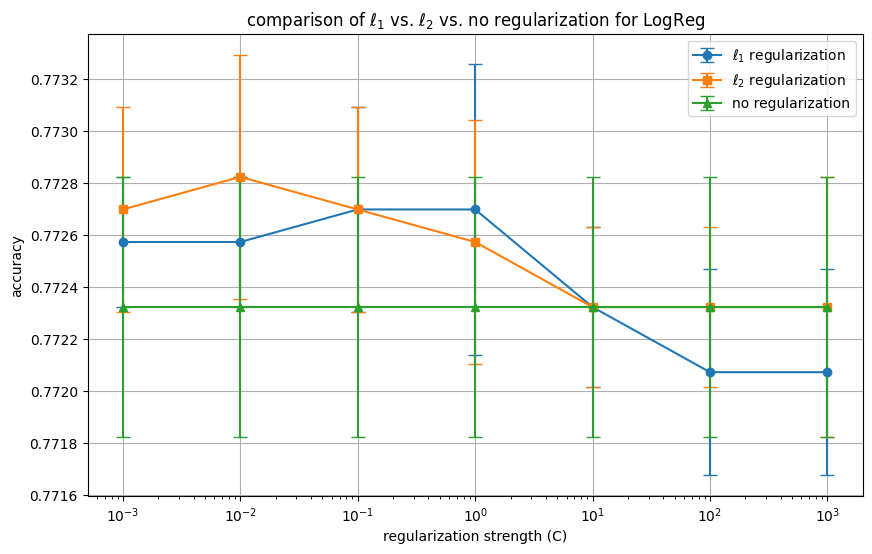

In [69]:
# strengths to test
regularization_strengths = [1.e-03, 1.e-02, 1.e-01, 1.e+00, 1.e+01, 1.e+02, 1.e+03]

l1_scores = []
l2_scores = []
no_reg_scores = []

# perform cross val for each strength
for C in regularization_strengths:
    # L1 regularization
    l1_model = LogisticRegression(penalty='l1', solver='liblinear', C=C, max_iter=1000)
    l1_score = cross_val_score(l1_model, X_train_scaled, y_train_encoded, cv=5, scoring='accuracy')
    l1_scores.append((l1_score.mean(), l1_score.std()))

    # L2 regularization
    l2_model = LogisticRegression(penalty='l2', solver='lbfgs', C=C, max_iter=1000)
    l2_score = cross_val_score(l2_model, X_train_scaled, y_train_encoded, cv=5, scoring='accuracy')
    l2_scores.append((l2_score.mean(), l2_score.std()))

    # no regularization (which is effectively a super large C for L2 penalty)
    no_reg_model = LogisticRegression(penalty='l2', solver='lbfgs', C=1e10, max_iter=1000)
    no_reg_score = cross_val_score(no_reg_model, X_train_scaled, y_train_encoded, cv=5, scoring='accuracy')
    no_reg_scores.append((no_reg_score.mean(), no_reg_score.std()))

# get the means/std
l1_means, l1_stds = zip(*l1_scores)
l2_means, l2_stds = zip(*l2_scores)
no_reg_means, no_reg_stds = zip(*no_reg_scores)

# plot results
plt.figure(figsize=(10, 6))
plt.errorbar(regularization_strengths, l1_means, yerr=l1_stds, label='$\ell_1$ regularization', fmt='o-', capsize=5)
plt.errorbar(regularization_strengths, l2_means, yerr=l2_stds, label='$\ell_2$ regularization', fmt='s-', capsize=5)
plt.errorbar(regularization_strengths, no_reg_means, yerr=no_reg_stds, label='no regularization', fmt='^-', capsize=5)

plt.xscale('log')
plt.xlabel('regularization strength (C)')
plt.ylabel('accuracy')
plt.title('comparison of $\ell_1$ vs. $\ell_2$ vs. no regularization for LogReg')
plt.legend()
plt.grid(True)
plt.show()


**(d)** Implement a *non-linear* support vector machine classifier from `scikit-learn` to predict the solubility group. Explain roughly how this model works. What are the hyperparameters associated with this model and what do they control? Explore the effects of changing these hyperparameters on the predictive performance of your model and how well your training data fits your data. Try to identify an optimal set of hyperparameters using cross validation. How does this predictive performance of this model compare to those you constructed in previous parts?

---

In [70]:
from sklearn.svm import SVC

# define the non-linear SVM
svm_model = SVC(kernel='rbf')  # going to use the radial basis function kernel for non-linearity

# perform cross val to find optimal hyperparameters
param_grid = {
    'C': [0.1, 1, 10, 100],  #  regularization param
    'gamma': ['scale', 'auto', 0.001, 0.01, 0.1, 1]  # kernel coefficient
}
grid_search = GridSearchCV(svm_model, param_grid, cv=5, scoring='accuracy', n_jobs=-1)
grid_search.fit(X_train_scaled, y_train_encoded)

# get the best model from cross val
best_svm_model = grid_search.best_estimator_

# predict/eval model
y_train_pred = best_svm_model.predict(X_train_scaled)
y_test_pred = best_svm_model.predict(X_test_scaled)
train_accuracy = accuracy_score(y_train_encoded, y_train_pred)
test_accuracy = accuracy_score(y_test_encoded, y_test_pred)

print(f"optimal parameters: {grid_search.best_params_}")
print(f"training accuracy: {train_accuracy:.4f}")
print(f"test accuracy: {test_accuracy:.4f}")

optimal parameters: {'C': 10, 'gamma': 0.001}
training accuracy: 0.7731
test accuracy: 0.7902


in one-sentence: the SVM works by finding the optimal hyperplane that separates (at a maximum) data points of different classes into a higher dimensional space. here, i'm using a non-linear SVM with an RBF kernel, which basically allows the SVM to handle complex decision boundaries that are non-linear (mapping features to a higher dimension). in terms of the hyperparameters:
- C: controls the trade-off between having a low error on training data and minimizing the models's complexity (regularization). smaller values $\uparrow$  regularization & larger values are more used for fitting the training data.
- gamma: defines how far the influence of a single training example reaches. so, small gamma = points far from the decision boundary are considered & large gamma = only close points to boundary are considered

how this model compares to the previous ones: performs considerably better on the test dataset, so it's generalizing really well - and does a better job compared to part **a** and **b**.